In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load in the data and scale it
df = pd.read_csv('Encoded_data_3000_V3.csv', index_col=0)

In [3]:
df.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers_lawns',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose_Hybrid_Climbers',
       'Category_Rose_Miniature_Floribundas', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Flowering_Season_Apr_May_Summer', 'Flowering_Season_Dec_Jan_Winter',
       'Flowering_Season_Feb_Mar_Spring',
       'Flowering_Season_Flowers are inconspicuous',
       'Flowering_Season_Flowers once in many years',
       'Flowering_Season_

In [4]:
df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [5]:
kmean_data = df.copy()
data = df

In [6]:
kmean_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [7]:
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


# KMeans

In [8]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=36, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(kmean_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(data['Cluster'].value_counts())

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15    157
23    145
0     102
13     96
11     94
19     90
5      89
27     84
1      84
31     79
35     74
28     73
8      70
12     69
18     68
10     67
26     61
2      61
33     60
30     57
7      56
16     56
29     56
6      55
21     51
24     49
34     48
9      44
32     40
4      39
17     37
22     37
25     33
20     31
14     27
3      23
Name: Cluster, dtype: int64


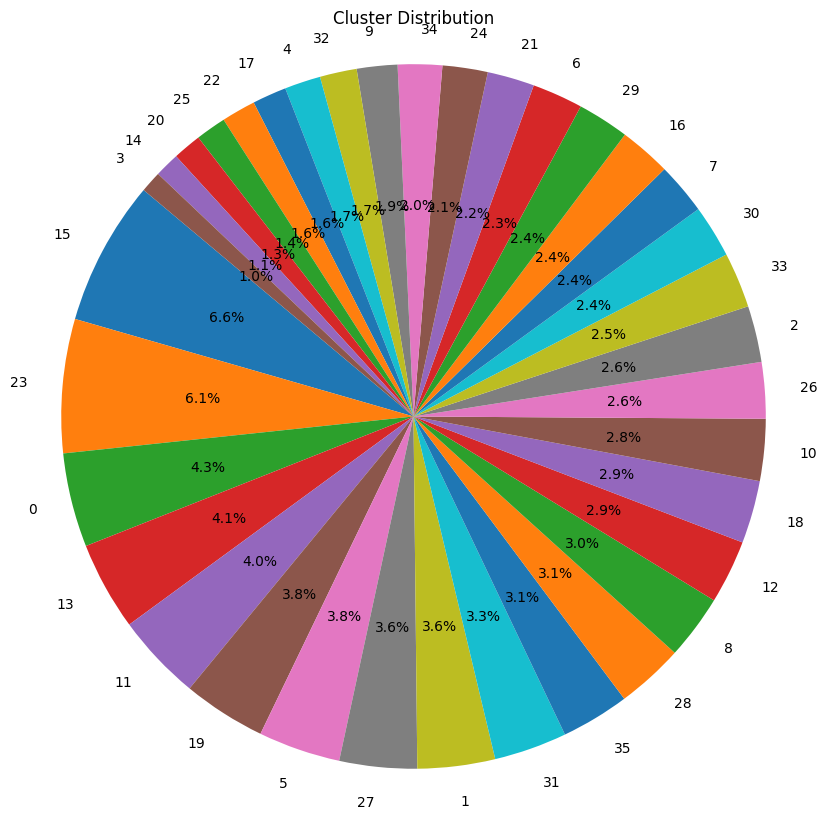

In [9]:
# Calculate the count of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(kmean_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.2095814612591566


In [11]:
#dataframe with cluster labels
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more,Cluster
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,12
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,30
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,14
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,29
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,13
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,13
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,1,1,1


In [12]:
# Assuming 'data' is your DataFrame
data.to_csv('KMeans_data_with_cluster_id_V1.csv')

In [13]:
#Calculating cluster means

# Group data by cluster and calculate cluster means
cluster_means = data.groupby('Cluster').mean()

# Create a new dataframe to store cluster means
cluster_means_df = pd.DataFrame(cluster_means)

# Display the cluster means dataframe
cluster_means_df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.117647,0.009804,0.039216,0.000000,0.000000,0.000000,0.000000,0.009804,0.117647,0.235294,...,0.901961,0.098039,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.411765,0.892157
1,0.011905,0.000000,0.023810,0.000000,0.000000,0.000000,0.547619,0.000000,0.011905,0.916667,...,0.035714,0.000000,0.000000,0.000000,0.000000,0.011905,0.952381,0.940476,0.404762,0.142857
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.213115,0.786885,0.000000,0.000000,0.000000,1.000000,0.901639,0.967213
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.956522,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,1.000000,1.000000,0.956522
4,0.025641,0.000000,0.230769,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.076923,...,0.820513,0.102564,0.000000,0.000000,0.025641,0.000000,0.051282,0.948718,0.717949,0.102564
5,0.033708,0.089888,0.033708,0.000000,0.000000,0.000000,0.056180,0.000000,0.033708,0.685393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.898876,0.089888,0.415730
6,0.018182,0.000000,0.018182,0.890909,0.890909,0.018182,0.000000,0.036364,0.018182,0.654545,...,0.018182,0.036364,0.000000,0.000000,0.000000,0.000000,0.036364,0.981818,0.163636,0.890909
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.964286,0.000000,0.000000,...,0.017857,0.303571,0.410714,0.035714,0.142857,0.053571,0.017857,0.982143,0.339286,0.696429
8,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.471429,0.000000,0.028571,0.685714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.985714,0.928571,0.042857,0.400000


In [14]:
# Assuming 'cluster_means_df' is your DataFrame
cluster_means_df.to_csv('KMeans_cluster_means_df_V1.csv')

# Recommendation

In [15]:
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more,Cluster
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,12
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,30
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,14
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,29
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,13
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,13
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,1,1,1


In [16]:
cluster_means_df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.117647,0.009804,0.039216,0.000000,0.000000,0.000000,0.000000,0.009804,0.117647,0.235294,...,0.901961,0.098039,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.411765,0.892157
1,0.011905,0.000000,0.023810,0.000000,0.000000,0.000000,0.547619,0.000000,0.011905,0.916667,...,0.035714,0.000000,0.000000,0.000000,0.000000,0.011905,0.952381,0.940476,0.404762,0.142857
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.213115,0.786885,0.000000,0.000000,0.000000,1.000000,0.901639,0.967213
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.956522,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,1.000000,1.000000,0.956522
4,0.025641,0.000000,0.230769,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.076923,...,0.820513,0.102564,0.000000,0.000000,0.025641,0.000000,0.051282,0.948718,0.717949,0.102564
5,0.033708,0.089888,0.033708,0.000000,0.000000,0.000000,0.056180,0.000000,0.033708,0.685393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.898876,0.089888,0.415730
6,0.018182,0.000000,0.018182,0.890909,0.890909,0.018182,0.000000,0.036364,0.018182,0.654545,...,0.018182,0.036364,0.000000,0.000000,0.000000,0.000000,0.036364,0.981818,0.163636,0.890909
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.964286,0.000000,0.000000,...,0.017857,0.303571,0.410714,0.035714,0.142857,0.053571,0.017857,0.982143,0.339286,0.696429
8,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.471429,0.000000,0.028571,0.685714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.985714,0.928571,0.042857,0.400000


In [17]:
def recommend_plants(input_values, cluster_means_df, data, top_n=20):

    # Prepare input vector for cluster-mean similarity
    user_vector = pd.DataFrame(index=[0], columns=cluster_means_df.columns)
    user_vector = user_vector.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in user_vector.columns:
            user_vector.at[0, column] = 1  # Set the input value to 1 in the input vector
            

    # Step 2: Calculate similarity between the user vector and the cluster mean vectors
    cluster_similarities = cosine_similarity(user_vector, cluster_means_df)

    # Find the cluster with the highest similarity
    optimal_cluster = np.argmax(cluster_similarities)
    print("Optimal Cluster:", optimal_cluster)
    
    
    # Prepare input vector for cluster similarity
    user_vector1 = pd.DataFrame(index=[0], columns=data.columns)
    user_vector1 = user_vector1.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in user_vector1.columns:
            user_vector1.at[0, column] = 1  # Set the input value to 1 in the input vector
            

    # Step 3: Calculate similarity between the user vector and plants in the optimal cluster
    optimal_cluster_indices = data[data['Cluster'] == optimal_cluster].index
    optimal_cluster_data = data.loc[optimal_cluster_indices]
    similarities = cosine_similarity(user_vector1, optimal_cluster_data)
    optimal_cluster_data['Similarity'] = similarities.flatten()
    
        
    # Sort by similarity scores in descending order
    recommended_plants = optimal_cluster_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]


    return recommended_plants

In [18]:
# Example usage

input_values = {
    'Category_Shrubs': 1,
    'Light_Sun growing': 1,
    'Light_Semi shade': 1,
    'Water_Normal': 1,
    'Primarily_Grown_for_Flowers': 1,
    'Flowering_Season_Year-around flowering': 1,
    'Spread_or_Width_1 to 2 meters': 1,
    'Height_or_Length_1 to 2 meters': 1,
    'Foliage_Color_Green': 1
    
}

recommendations = recommend_plants(input_values, cluster_means_df, data)
if recommendations is not None:
    print(recommendations)

Optimal Cluster: 23
          Similarity
Plant_Id            
1286        0.113961
1887        0.113855
395         0.113855
509         0.113855
2458        0.113855
2213        0.113855
1524        0.113855
1644        0.113855
1269        0.113750
1266        0.113750
13          0.113750
1263        0.113750
1240        0.113750
1277        0.113750
1007        0.113750
971         0.113750
1044        0.113750
1291        0.113750
1287        0.113750
108         0.113750


In [19]:
list_plant = recommendations.index.tolist()
list_plant

[1286,
 1887,
 395,
 509,
 2458,
 2213,
 1524,
 1644,
 1269,
 1266,
 13,
 1263,
 1240,
 1277,
 1007,
 971,
 1044,
 1291,
 1287,
 108]

In [20]:
# Load in the data and scale it
plant_data = pd.read_csv('data_indiaplant_1_3000.csv', index_col=0)

In [21]:
plant_data

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
0,1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
1,2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
2,4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
3,5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
4,7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
906,2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
907,2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and 

In [22]:
plant_data = plant_data.set_index('Plant_Id')
plant_data

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and easy to g

In [23]:
extracted_rows = plant_data.loc[list_plant]

In [24]:
extracted_rows

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1286,Malvaviscus arboreus rosea,NaN,Marathi - Mirchi Jasvandh Gulabi,Shrubs,Malvaceae Hibiscus or Cotton family,"Sun growing, Semi shade",Normal,Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Auspicious or Feng Shui plant, Good for Cut fl...","Native tropical America., The flowers are a lo...","Very easy to grow., Do well in semi shade and ..."
1887,Aphelandra sinclairiana,"Panama, Coral Aphelandra",NaN,Shrubs,Acanthaceae or Crossandra or Thunbergia family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Irregular,NaN,"Rare Plant or difficult to get plant, Attracts...","Well shaped shrub to about 2 m high., Leaves l...",An easy plant to grow plant. Does best in semi...
395,Stachytarpheta indica red,"Stachytarpheta Red, Brazilian Tea",NaN,Shrubs,Verbenaceae or Verbena family,"Sun growing, Semi shade",Normal,Flowers,Year-around flowering,Green,1 to 2 meters,1 to 2 meters,"Spreading, Upright or Erect",NaN,"Indigenous (native to India), Good for screeni...","Great for attracting birds., Native - Africa a...",Plants are susceptible to waterlogging and sho...
509,"Daedalacanthus nervosus, Eranthemum pulchellum",Daedalacanthus Nervosus,Marathi - Nili Aboli,"Shrubs, Groundcovers",Acanthaceae or Crossandra or Thunbergia family,"Sun growing, Semi shade",Normal,Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Indigenous (native to India), Auspicious or Fe...","Native from India, Sri Lanka., Evergreen shrub...","Very quick growing., Grow well in partial shad..."
2458,Gardenia taitensis,Tiare,"Bengali - Gandharaj, Hindi - Gandharaj, Oriya ...",Shrubs,Rubiaceae or Ixora and Pentas family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Fragrant flowers or leaves, Auspicious or Feng...",This gardenia has huge star saped single flowe...,"Soil - rich, humid, acid, As with the other ga..."
2213,"Musa species, Musella lasiocarpa",Golden Lotus Banana,NaN,Shrubs,Musaceae or Banana family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,Flowers once in many years,Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Auspicious or Feng Shui plant, Rare Plant or d...",The plants name is Musella lasiocarpa. We have...,Plant in full sun to light shade and give regu...
1524,Clerodendrum macrosphon,Clerodendrum Macrosphon,NaN,Shrubs,Verbenaceae or Verbena family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Spreading,NaN,"Good for screening, Good for Hedges and Border...","A beautiful, dwarf, bushy shrub., Grows to 1 m...",Plant is easy to grow. Can grow in full sun in...
1644,Mussaenda philippica calcutta sunrise,Mussaenda Orange,Marathi - Musanda Keshari,Shrubs,Rubiaceae or Ixora and Pentas family,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,Upright or Erect,NaN,"Indigenous (native to India), Good for screeni...",This is a relatively new introduction. The flo...,"Plants are quick growing., They are vigerous a..."
1269,Lantana camara erecta nivea,Lantana White Erect Growing,"Marathi - Ghaneri, Hindi - Desi Lantana, Gujar...",Shrubs,Verbenaceae or Verbena family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,1 to 2 meters,"Spreading, Upright or Erect",NaN,"Fragrant flowers or leaves, Good f

In [25]:
#example 2
input_values_1 = {
    'Category_Medicinal Plants': 1,
    'Category_Trees': 1,
    'Light_Sun growing': 1,
    'Water_Requires Less': 1,
    'Primarily_Grown_for_Foliage': 1,
    'Foliage_Color_Green': 1,
    'Height_or_Length_More than 12 meters': 1,
    'Spread_or_Width_More than 12 meters': 1    
}

recommendations_1 = recommend_plants(input_values_1, cluster_means_df, data)
if recommendations_1 is not None:
    print(recommendations_1)

Optimal Cluster: 26
          Similarity
Plant_Id            
1352        0.093454
1452        0.093386
1750        0.093386
1759        0.093386
2699        0.093386
1356        0.093318
1566        0.093250
1349        0.093250
2678        0.093183
1561        0.093116
1385        0.077992
1787        0.077935
2878        0.077935
2464        0.077878
1944        0.077878
2821        0.077878
2868        0.077878
2676        0.077878
269         0.077878
1376        0.077878


In [26]:
list_plant_1 = recommendations_1.index.tolist()
list_plant_1

[1352,
 1452,
 1750,
 1759,
 2699,
 1356,
 1566,
 1349,
 2678,
 1561,
 1385,
 1787,
 2878,
 2464,
 1944,
 2821,
 2868,
 2676,
 269,
 1376]

In [27]:
extracted_rows_1 = plant_data.loc[list_plant_1]

In [28]:
extracted_rows_1

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1352,Adansonia digitata,"Baobab, Monkey Bread, Sour Gourd, African Cala...","Marathi - Gorak Chinch, Hindi - Gorak Emli, Go...","Trees, Medicinal Plants",Malvaceae Hibiscus or Cotton family,Sun growing,"Normal, Can tolerate less",Foliage,"June, July, August, September",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Fragrant flowers or leaves, Good for making bo...",From the Indian ocean Island Nation of Madagas...,"Usually planted in large gardens, parks and on..."
1452,Tectona grandis,"Teakwood, Teak","Hindi - Sagun,Sagwan, Gujarati - Sag, Marathi ...","Trees, Medicinal Plants",Verbenaceae or Verbena family,Sun growing,"Normal, Can tolerate more",Stems or Timber,"June, July, August, September, Flowers are inc...",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Indigenous (native to India), Fragrant flowers...",Probably the best timber in the world. The tre...,"Grow in almost all types of soil., Leaf fall s..."
1750,"Cassia renigera, C. javanica x grandis","Java Cassia, Apple-blossom Shower, Javanese Ca...",Marathi - Gulabi Cassia,"Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,Normal,Flowers,"May, June, July",Green,More than 12 meters,More than 12 meters,"Upright or Erect, Weeping",NaN,"Attracts birds, Attracts butterflies, Attracts...","Native of Malaysia, Indonesia., A beautiful, m...","It is not a long lived plant., Flowering takes..."
1759,Terminalia arjuna,"White Murdah, Arjuna Myrobalan","Marathi - Arjun, Hindi - Arjuna, Bengali - Arj...","Trees, Medicinal Plants",Combretaceae or Terminalia family,Sun growing,"Normal, Can tolerate more",Foliage,"April, May, Flowers are inconspicuous",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...","A large deciduous tree - 15-20 m high., Leaves...","Tree grows well in humid, tropical climate and..."
2699,Cassia renigera hybrida,Dark Pnik Cassia Renigera,Marathi - Dark Gulabi Cassia,"Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,Normal,Flowers,"May, June, July",Green,More than 12 meters,More than 12 meters,"Upright or Erect, Weeping",NaN,"Fragrant flowers or leaves, Attracts birds, At...","Native of Malaysia, Indonesia., The stamens of...","Flowering takes place when 4-5 years old., It ..."
1356,Azadirachta indica,"Indian Neem Tree, Margosa Tree","Marathi - Kadu Limba, Hindi- Neem, Bengali - N...","Trees, Medicinal Plants",Meliaceae or Neem family,Sun growing,Requires less,Foliage,"March, April, May, June, July",Green,More than 12 meters,More than 12 meters,"Spreading, Upright or Erect",NaN,"Indigenous (native to India), Fragrant flowers...",Wild in the dry forests of the Deccan and Karn...,"The neem tree is drought tolerant., It grows i..."
1566,"Parkia biglandulasa, Parkia javanica","Drumstick Tree, Badminton Ball Tree, African L...","Marathi - Chendu Phali, Hindi - Chendul-ka-jhar","Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,"Normal, Can tolerate more",Foliage,"March, April, May, June",Green,More than 12 meters,More than 12 meters,"Spreading, Upright or Erect",NaN,"Indigenous (native to India), Fragrant flowers...",Biglandulosa refers to two small glands at the...,"Prefers warm and moist climate., Planting in l..."
1349,"Albizzia lebbeck, Mimosa lebbeck","Frywood, Parrot Tree, Womans Tongue, Black Shi...","Hindi - Shirish, Garso, Kalshish, Sirar, Benga...","Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more","Flowers, Foliage","February, March",Green,More than 12 meters,More than 12 meters,Spreading,NaN,"Indigenous (native to India), Fragrant flowers...",Albizia i